In [ ]:
#https://jaketae.github.io/study/rejection-sampling/

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def p(x):
    return norm.pdf(x, loc=30, scale=10) + norm.pdf(x, loc=80, scale=20) + norm.pdf(x, loc=90, scale=20)

In [3]:
def q(x):
    return norm.pdf(x, loc=50, scale=30)

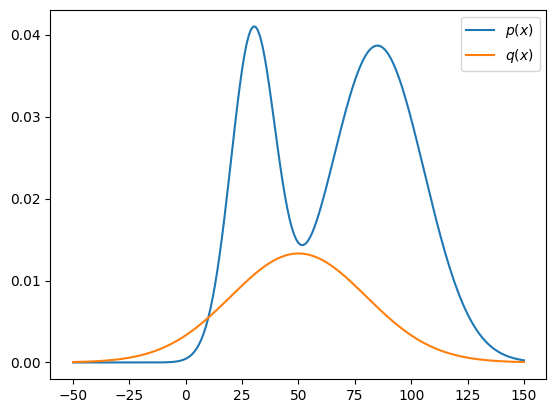

In [5]:
x = np.arange(-50, 151)
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, q(x), label=r"$q(x)$")
plt.legend()
plt.show()

In [6]:
k = max(p(x) / q(x))

In [11]:
k

10.584423819904124

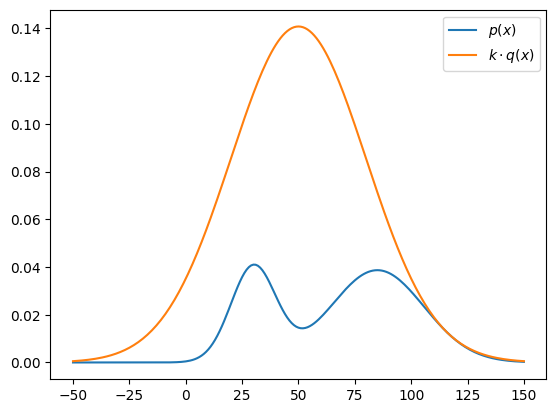

In [7]:
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, k * q(x), label=r"$k \cdot q(x)$")
plt.legend()
plt.show()

In [14]:
def sample(size):
    xs = np.random.normal(50, 30, size=size) # values from q(x) distribution
    cs = np.random.uniform(0, 1, size=size) #
    mask = (p(xs) / (k * q(xs)) ) > cs # choose with probability
    return xs[mask]   

C:\Users\qwertyforce\AppData\Local\Temp\ipykernel_26928\3654393579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


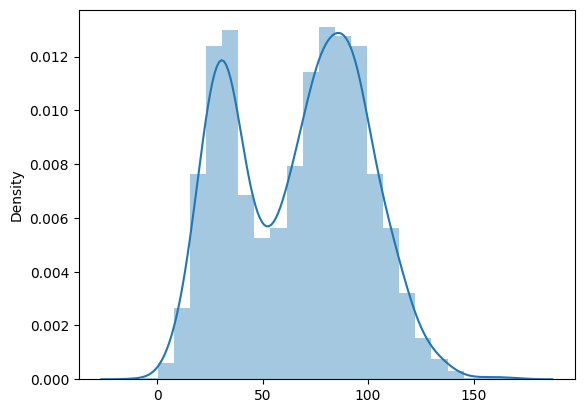

In [15]:
samples = sample(10000)
sns.distplot(samples)
plt.show()